# **Netflix Userbase Analysis**

# *Import Libraries*

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

# **Part 1: Data Loading and Preprocessing**

# *1. Load the Dataset*

In [ ]:
data = pd.read_csv('Netflix_Userbase.csv')

print(data.head())

print('-' * 50)

print(data.describe())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
--------------------------------------------------
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400  

# *2. Encode Categorical Variables*

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['M_Rev'] = data['Monthly Revenue'].astype(int)

# *3. Feature Selection*

In [ ]:
X = data_dummies.drop(["M_Rev", "Monthly Revenue"], axis = 1)
y = data_dummies["M_Rev"]

# **Part 2: Exploratory Data Analysis (EDA)**

# *1. Descriptive Statistics*

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


# *2. Visualizations*

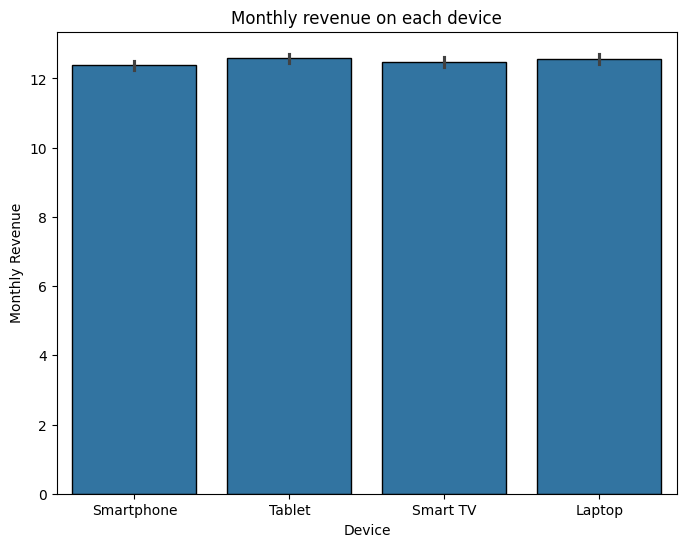

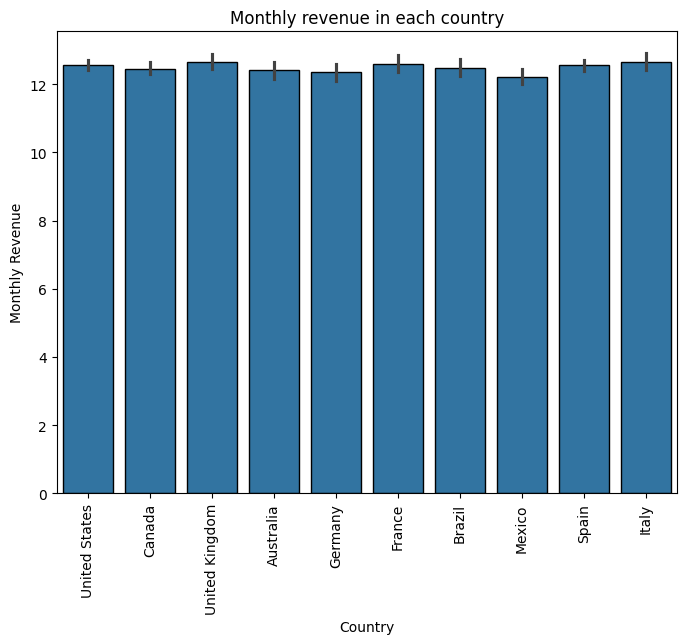

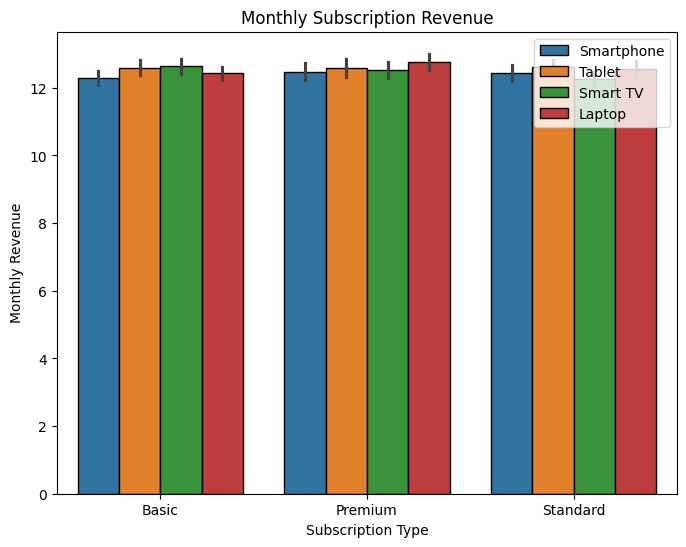

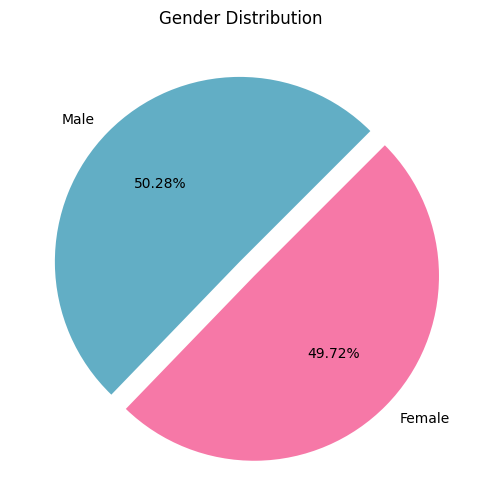

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Device", y ="Monthly Revenue", data=data, edgecolor="black")
plt.title("Monthly revenue on each device")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="Monthly Revenue", data=data, edgecolor="black")
plt.title("Monthly revenue in each country")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="Subscription Type", y="Monthly Revenue", hue="Device", data=data, edgecolor="black", lw=1)
plt.legend(loc="upper right")
plt.title("Monthly Subscription Revenue")
plt.show()

plt.figure(figsize=(8,6))
gender = data.Gender.value_counts()
index = ["Male","Female"]
colors = ["m","c"]
exp = [0.01,0.1]
values= gender.values.tolist()

plt.pie(values, labels=index, autopct="%.2f%%", colors=["#62aec5", "#f678a7"], explode=exp, startangle=45)
plt.title('Gender Distribution')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

# *1. Build the Model*

In [ ]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

rsq = r2_score(y_train, y_test)
print(f"R-squared: {rsq:.4f}")

mse = mean_squared_error(y_train, y_test, squared=False)
print(f"Mean Squared Error: {mse:.4f}")

mae = mean_absolute_error(y_train, y_test)
print(f"Mean Absolute Error: {mae:.4f}")


R-squared: -0.8734
Mean Squared Error: 2.3622
Mean Absolute Error: 1.8984


# **Part 4: Logistic Regression Model**

# *1. Model Building*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_predict = model.predict(X_test_scaled)

# *2. Evaluation*

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

report = f"""
Accuracy: {accuracy}

Confusion Matrix:
{conf_matrix}

Classification Report:
{class_report}
"""

print(report)


Accuracy: 0.15

Confusion Matrix:
[[ 5 18 22 15 12 13]
 [ 9  9 25 13 10 13]
 [11 13 19 16 21 13]
 [13  7 22 16 16 14]
 [ 5 16 18 20 15 11]
 [10 13 12 12 12 11]]

Classification Report:
              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500




# **Part 5: Comparative Analysis and Visualization**

# *1. Feature Importance*

<ipython-input-32-5311658fd011>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette="viridis")


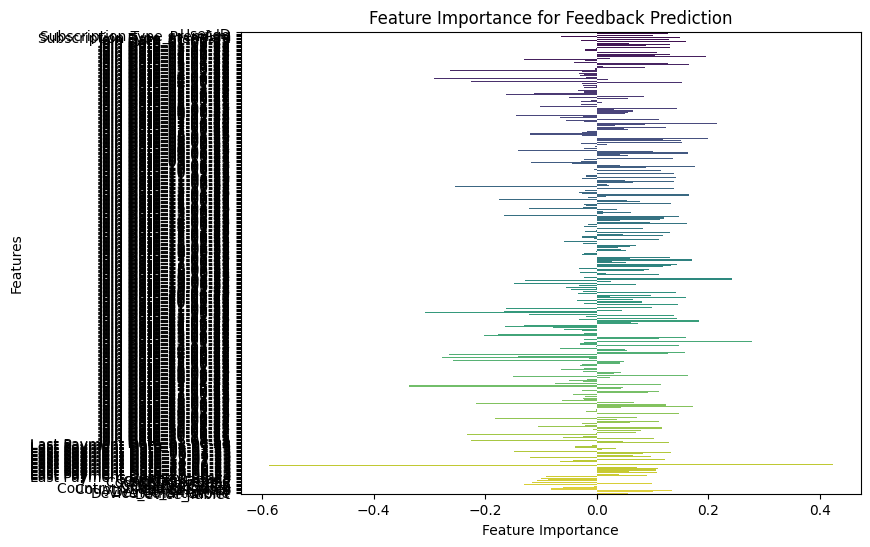

In [ ]:
feature_importance = model.coef_[0]

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Feedback Prediction")
plt.show()

# *2. Insights*

              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500



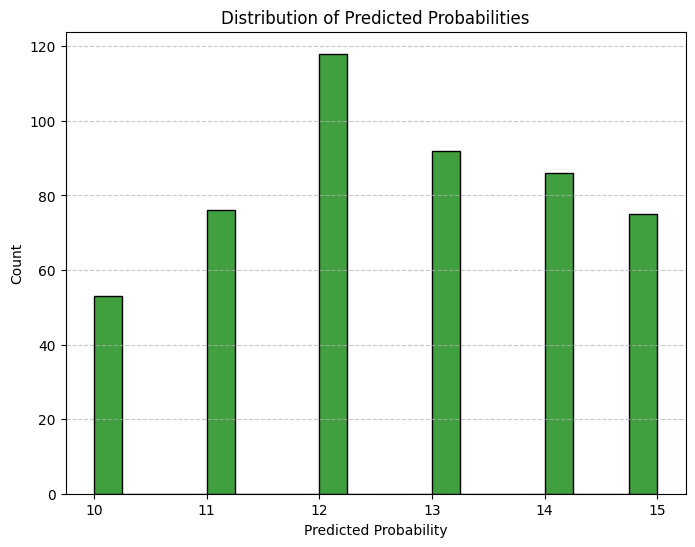

In [ ]:
y_predict = model.predict(X_test_scaled)
print(classification_report(y_test, y_predict))

plt.figure(figsize=(8, 6))
sns.histplot(y_predict, bins=20, color='green', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()